In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv("medical_examination.csv")
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] > 1, 'gluc'] = 1
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1


In [31]:
overweight_col = df['weight'] / ((df['height'] / 100)**2)
overweight_col = overweight_col.to_frame()
overweight_col.columns = ['index']
overweight_col.loc[overweight_col['index'] <= 25, 'index'] = 0
overweight_col.loc[overweight_col['index'] > 25, 'index'] = 1
overweight_col

,index
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
69995,1.0
69996,1.0
69997,1.0
69998,1.0


In [32]:
df['overweight'] = overweight_col
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [33]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
df_cat

,cardio,variable,value
0,0,active,1.0
1,1,active,1.0
2,1,active,0.0
3,1,active,1.0
4,0,active,0.0
...,...,...,...
419995,0,smoke,1.0
419996,1,smoke,0.0
419997,1,smoke,0.0
419998,1,smoke,0.0


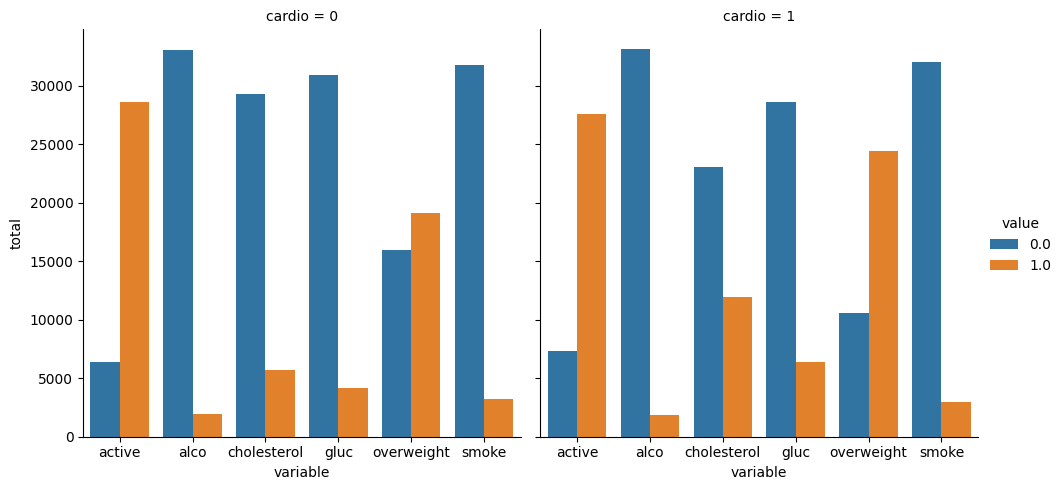

In [34]:
fig = sns.catplot(df_cat, x='variable', hue='value', col='cardio', kind='count')
fig.set(ylabel='total')

In [40]:
mask1 = df['ap_lo'] > df['ap_hi']

mask2 = df['height'] < df['height'].quantile(0.025)
mask3 = df['height'] > df['height'].quantile(0.975)

mask4 = df['weight'] < df['weight'].quantile(0.025)
mask5 = df['weight'] > df['weight'].quantile(0.975)

df_heat = df[mask1 | mask2 | mask3 | mask4 | mask5]


In [41]:
corr = df_heat.corr().round(1)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
age,-0.0,1.0,-0.1,-0.1,0.1,0.0,0.2,0.1,0.1,-0.1,-0.0,-0.0,0.3,0.1
sex,-0.0,-0.1,1.0,0.7,0.3,0.0,0.1,-0.1,-0.0,0.3,0.2,-0.0,-0.0,-0.0
height,-0.0,-0.1,0.7,1.0,0.4,0.0,0.1,-0.1,0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,-0.0,0.1,0.3,0.4,1.0,0.0,0.3,0.2,0.2,0.1,0.1,-0.1,0.3,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
ap_lo,-0.0,0.2,0.1,0.1,0.3,0.1,1.0,0.2,0.1,0.0,0.1,-0.0,0.3,0.3
cholesterol,-0.0,0.1,-0.1,-0.1,0.2,0.0,0.2,1.0,0.4,0.0,0.1,0.0,0.2,0.2
gluc,0.0,0.1,-0.0,0.0,0.2,-0.0,0.1,0.4,1.0,0.0,0.1,-0.0,0.1,0.1
smoke,-0.0,-0.1,0.3,0.2,0.1,-0.0,0.0,0.0,0.0,1.0,0.3,0.0,-0.0,-0.0


<Axes: >

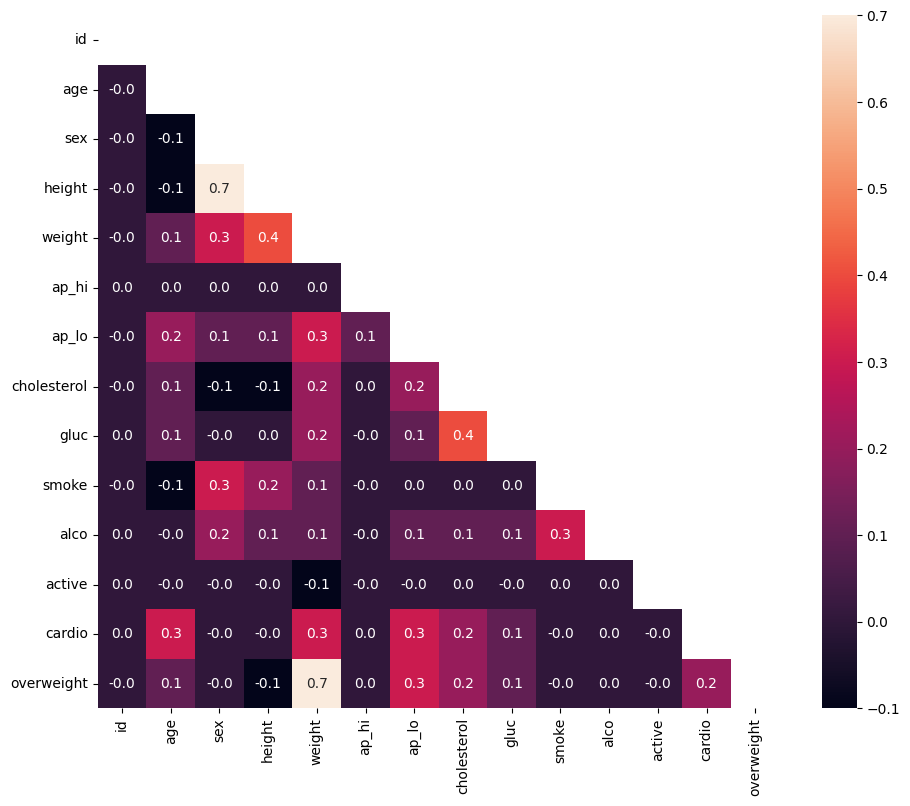

In [44]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f')